In [120]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

# Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac{1}{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

# Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

4. En déduire un algorithme de simulation conditionnelle.

1. C'est la loi des grands nombres (convergence en moyenne et presque sûrement de la moyenne vers l'espérance) qui autorise cette estimation de l'espérance conditionnelle.

2. On donne la densité conditionnelle du vecteur des composantes de Z correspondant aux points de discrétisation sans observation, qui est un vecteur gaussien d'après le chapitre 4. On obtient la formule suivante en notant Z = (Y,X) où X est la v.a. des points observés et Y celle de ceux non observés, quitte à réarranger l'ordre des composantes de Z : 
$\displaystyle f_{Y|X=x}(y)=\frac{1}{\sqrt{(2\pi)^{N-n} det(CS_Y)}}exp(-\frac{1}{2}(y-\psi (x))^T CS_Y^{-1} (y-\psi (x)))$ avec $\psi (x)=E(Y|X=x)=E(Y) + C_{Y,X}C_X^{-1}(x-E(X)), CS_Y  = C_Y - C_{Y,X}C_Z^{-1}C_{X,Y}$ (complément de
Schur) sachant que C est la matrice de covariance de Z que l'on écrit en bloc comme suit : 
$\left(\begin{array}{ccc} C_Y & C_{Y,X} \\ C_{X,Y} & C_X  \end{array}\right)$.

3. On rappelle deux propriétés des variables aléatoires gaussiennes : si $X \hookrightarrow \mathcal{N}(0,1)$ alors $a+bX \hookrightarrow \mathcal{N}(a,b^2)$ et si $X \hookrightarrow \mathcal{N}(m_1,\sigma_1^2)$ et $Y \hookrightarrow \mathcal{N}(m_2,\sigma_2^2)$ sont indépendantes alors $X+Y \hookrightarrow \mathcal{N}(m_1 + m_2,\sigma_1^2+\sigma_2^2))$. Ainsi, avec $Y=(Y_1, ..., Y_p)$ et $Z=m+RY$ où $\forall i, Y_i \hookrightarrow \mathcal{N}(0,1)$, la jième composante de Z est une combinaison linéaire de composantes de Y $\displaystyle Z_j = m_j + \sum_{i} Y_iR_{j,i}$ donc $\displaystyle Z_j \hookrightarrow \mathcal{N}(m_j,\sum_{i}R_{j,i}^2)$.

4. Un algorithe de simulation pourrait donc se faire ainsi  :
On simule $Y|X=x$ (notation pour la loi de Y sachant X=x) en utilisant la décomposition de Cholesky de sa matrice de covariance (complément de Schur de la matrice de covariance de Z). Pour ce faire, on calcule d'une part cette matrice de covariance et on simule un vecteur aléatoire gaussien U dont les composantes suivent la loi normale centrée réduite avec l'algorithme de Box-Muller (ou en utilisant directement une fonction numpy.random) d'autre part. Enfin, le vecteur $Y_{bis} = m + LU$ suit la loi voulue avec $L$ définie par $CS_Y = LL^T$ et $m$ est le vecteur espérance de composantes toutes égales à $\mu$.

# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [121]:
# Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

# Discrétisation
A = 0
B = 500
N = 101  # Nombre de points de discrétisation
Delta = (B - A) / 100
discretization_indexes = np.arange(N)
discretization = discretization_indexes * Delta
# Paramètres du modèle

mu = -5
a = 50
sigma2 = 12

# Données

observation_indexes = [0, 20, 40, 60, 80, 100]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

# Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes = list(set(discretization_indexes) - set(observation_indexes))

## Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [122]:
def cov(h, a, sigma2):
    return sigma2 * np.exp(-np.abs(h) / a)


Cov = np.vectorize(cov)

2. Calculer la matrice de distance.

In [123]:
matrice_dist = np.array(
    [
        [np.abs(discretization[i] - discretization[j]) for i in range(N)]
        for j in range(N)
    ]
)
print(matrice_dist)

[[  0.   5.  10. ... 490. 495. 500.]
 [  5.   0.   5. ... 485. 490. 495.]
 [ 10.   5.   0. ... 480. 485. 490.]
 ...
 [490. 485. 480. ...   0.   5.  10.]
 [495. 490. 485. ...   5.   0.   5.]
 [500. 495. 490. ...  10.   5.   0.]]


3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [124]:
matrice_cov = Cov(matrice_dist, a, sigma2)
print(matrice_cov)

[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [125]:
C_observation = np.array(
    [[matrice_cov[i, j] for i in observation_indexes] for j in observation_indexes]
)
C_inconnue = np.array(
    [[matrice_cov[i, j] for i in unknown_indexes] for j in unknown_indexes]
)
C_incobs = np.array(
    [[matrice_cov[i, j] for i in unknown_indexes] for j in observation_indexes]
)

print(np.shape(C_observation))
print(np.shape(C_inconnue))
print(np.shape(C_incobs))

(6, 6)
(95, 95)
(6, 95)


5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

(95,)


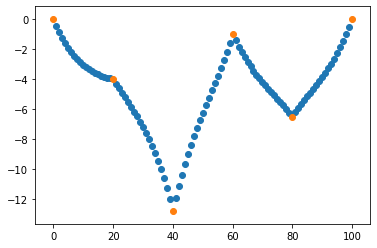

In [126]:
psi = mu + np.dot(
    np.dot(np.matrix.transpose(C_incobs), np.linalg.inv(C_observation)), depth - mu
)
# def f(x):
#    return np.exp(-0.5 * np.dot(np.matrix.transpose(y-psi), np.linalg.inv(Schur), y-psi) * (2*np.pi*np.linalg.det(Schur))**(-0.5))
# def g(x):
#    return x * f(x)
# cf. formule donnée dans les réponses aux questions théoriques

print(np.shape(psi))

plt.scatter(unknown_indexes, psi)
plt.scatter(observation_indexes, depth)
plt.show()

### Commentaire : 
Cela donne une représentation directe du fond de l'océan, on voit qu'il y a deux 'trous' successifs. On remarque aussi l'importance des points connus (observations) : si l'échantillon est mal choisi (tout plat par exemple), cela donne une vision erronée de la réalité

6. Calculer la matrice de covariance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

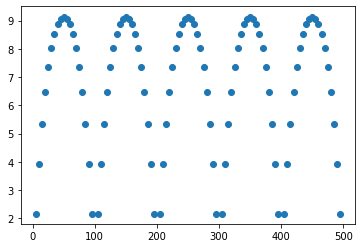

In [127]:
# la matrice de covaraince conditionnelle est le complément de Schur de la matrice de covariance initiale

Schur = C_inconnue - np.dot(
    np.matrix.transpose(C_incobs), np.dot(np.linalg.inv(C_observation), C_incobs)
)

V = [Schur[i, i] for i in range(len(Schur))]
pos = [i * Delta for i in unknown_indexes]
plt.scatter(pos, V)
plt.show()

La variance est relativement élevée pour les points les plus éloignés de ceux observés, ce qui témoigne d'une certaine dispersion. Au contraire, elle est très faible vers les points connus ! (Vaudrait 1 pour avoir la fonction complètée).

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

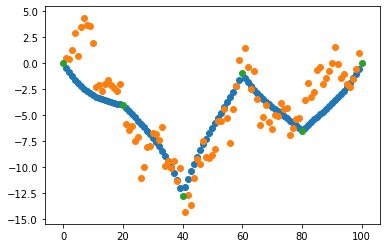

95


In [128]:
# simulation d'un vecteur gaussien

L = np.linalg.cholesky(Schur)
p = len(Schur) # p = N-n
U = rd.normal(0, 1, p)
Ybis = psi + np.dot(L, U)

plt.scatter(unknown_indexes, psi) # on utilise scatter pour mieux observer la dispersion des points aléatoires
plt.scatter(unknown_indexes, Ybis)
plt.scatter(observation_indexes, depth)
plt.show()
print(p)

La simulation est très dispersée, cela n'a pas l'air de très bien fonctionner en un seul tirage : d'où l'intérêt de faire une moyenne de plusieurs simulations.

In [129]:
def sim():  # fait une simulation de vecteur des profondeurs sans oublier les points observés
    L = np.linalg.cholesky(Schur)
    p = len(Schur)
    U = rd.normal(0, 1, p)
    Ybis = psi + np.dot(L, U)
    Z = [0] * 101
    for i, j in zip(observation_indexes, depth):
        Z[i] = j
    for i, j in zip(unknown_indexes, Ybis):
        Z[i] = j
    return np.array(Z)

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [130]:
Z = sim()


def longueur(Z):
    l = [np.sqrt(Delta ** 2 + (Z[i] - Z[i - 1]) ** 2) for i in range(1, 101)]
    L = sum(l)
    return L


print(longueur(Z))

524.182483716429


9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [131]:
def tirage(n):  # réalise un tirage de n longueurs
    ZZ = []
    for k in range(n):
        Z = sim()
        ZZ.append(longueur(Z))
    return ZZ

In [132]:
def longueur_selon_sim(n):
    ZZ = tirage(n)
    LL = sum(ZZ) / n
    return LL


print(longueur_selon_sim(100))
print(longueur_selon_sim(1000))


# longueur de l'espérance conditionnelle
psibis = np.array([0] * 101)
for i, j in zip(observation_indexes, depth):
    psibis[i] = j
for i, j in zip(unknown_indexes, psi):
    psibis[i] = j

print(sum([np.sqrt(Delta ** 2 + (psibis[i] - psibis[i - 1]) ** 2) for i in range(101)]))

522.4304738764276
522.3000906971906
508.3666634621549


La longueur de l'espérance conditionnelle est naturellement plus petite que l'espérance conditionnelle de la longueur étant donné que les points du vecteur espérance sont répartis assez régulièrement, ce qui résulte en un écart de profondeur plus petit.

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

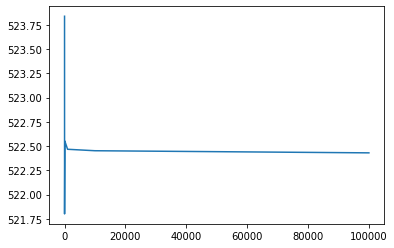

In [133]:
N = [1, 10, 100, 1000, 10000, 100000]
LLL = [longueur_selon_sim(n) for n in N]

plt.plot(N, LLL)
plt.show()

Ce graphe illustre bien la convergence vers une moyenne pour un grand nombre de simulations, en accord avec la loi des grands nombres. 

11. Représenter l'histogramme des longueurs de câbles générées.

(array([0.03929098, 0.        , 0.        , 0.        , 0.03929098,
        0.        , 0.        , 0.11787295, 0.03929098, 0.        ,
        0.03929098, 0.11787295, 0.07858197, 0.        , 0.07858197,
        0.11787295, 0.03929098, 0.11787295, 0.03929098, 0.15716394,
        0.11787295, 0.11787295, 0.11787295, 0.15716394, 0.11787295,
        0.27503689, 0.15716394, 0.11787295, 0.19645492, 0.15716394,
        0.07858197, 0.19645492, 0.11787295, 0.03929098, 0.11787295,
        0.03929098, 0.07858197, 0.03929098, 0.11787295, 0.07858197,
        0.        , 0.03929098, 0.03929098, 0.03929098, 0.03929098,
        0.        , 0.07858197, 0.15716394, 0.        , 0.07858197]),
 array([515.40647829, 515.6609896 , 515.91550091, 516.17001222,
        516.42452353, 516.67903483, 516.93354614, 517.18805745,
        517.44256876, 517.69708007, 517.95159138, 518.20610269,
        518.460614  , 518.71512531, 518.96963662, 519.22414793,
        519.47865924, 519.73317054, 519.98768185, 520.24219316

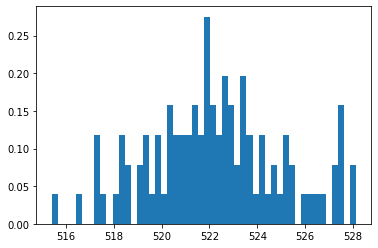

In [134]:
# Histogramme pour la formule de base de la question 8

ZZ = tirage(100)

plt.hist(np.array(ZZ), bins=50, density=True, label="Data")

(array([0.34452131, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.34452131, 0.        ,
        0.        , 0.        , 0.34452131, 1.03356393, 1.03356393,
        1.03356393, 0.68904262, 0.34452131, 1.03356393, 1.03356393,
        1.72260654, 0.68904262, 0.68904262, 1.72260654, 1.03356393,
        0.68904262, 0.68904262, 1.37808523, 1.72260654, 1.72260654,
        1.37808523, 1.37808523, 1.72260654, 1.72260654, 0.68904262,
        0.34452131, 1.37808523, 1.37808523, 0.34452131, 0.68904262,
        0.68904262, 0.34452131, 0.34452131, 1.37808523, 0.        ,
        0.34452131, 0.34452131, 0.34452131, 0.        , 0.34452131]),
 array([521.59428296, 521.62330874, 521.65233452, 521.6813603 ,
        521.71038608, 521.73941186, 521.76843764, 521.79746342,
        521.82648921, 521.85551499, 521.88454077, 521.91356655,
        521.94259233, 521.97161811, 522.00064389, 522.02966967,
        522.05869545, 522.08772123, 522.11674701, 522.1457728 

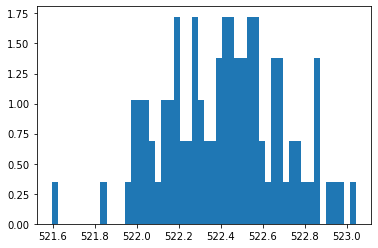

In [135]:
# Histogramme avec le calcul de la question 9 (on obtient évidemment un histogramme très centré sur la moyenne)

H = [longueur_selon_sim(100) for k in range(100)]

plt.hist(np.array(H), bins=50, density=True, label="Data")

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

* Méthode 1

On utilise le théorème centrale limite pour utiliser la formule de l'intervalle de confiance d'une loi normale comme approximation : 
$ \displaystyle I=[m-1.96\sigma; m+1.96\sigma]$ 

In [153]:
def moyenne(tableau):
    return sum(tableau, 0.0) / len(tableau)


def variance(tableau):
    m = moyenne(tableau)
    return moyenne([(x - m) ** 2 for x in tableau])


def ecartype(tableau):
    return variance(tableau) ** 0.5


m_confiance = moyenne(ZZ)
sigma_confiance = ecartype(ZZ)
print(f"[{m_confiance - 1.96*sigma_confiance} ; {m_confiance + 1.96*sigma_confiance}]")

[516.9283133043537 ; 526.5265756025069]


* Méthode 2 : On calcule "à la main" avec Python un intervalle de confiance.

In [154]:
# on fait 20 fois des tirages de 100 valeurs et on enlève les 5 valeurs les plus éloignées de la moyenne
# on stocke ensuite les valeurs extrêmales de l'intervalle trouvé à chaque fois et on en fait la moyenne

T = []
for i in range(20):
    ZZ = tirage(100)
    ZZ.sort()
    for j in range(5):
        if abs(moyenne(ZZ) - ZZ[0]) <= abs(moyenne(ZZ) - ZZ[-1]):
            ZZ.pop()
        else:
            del ZZ[0]
    T.append((ZZ[0], ZZ[-1]))
s1 = moyenne([x[0] for x in T])
s2 = moyenne([x[1] for x in T])

print(f"[{s1}, {s2}]")  # s1 et s2 donnent les bornes de l'intervalle de confiance

[517.2152633780786, 527.6878708113743]


L'intervalle obtenu est très proche de celui obtenu par la formule théorique approchée, c'est donc satisfaisant.
Cela signifie qu'environ 95% des longueurs tirées sont située dans cet intervalle. On obtient donc finalement une estimation assez précise de la longueur de câble à utiliser.

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

En première piste, on avait pensé à donner une estimation de cette probabilité en l'identifiant avec le majorant donné par l'inégalité de Markov $\displaystyle P(X\geq x)\leq \frac{E(X)^p}{x^p}$ avec p le plus élevé possible selon l'intégrabilité de la variable aléatoire. Mais cette approche est mauvaise car on a aucune idée de l'écart avec le majorant ou encore de la valeur de p. On a donc préféré recourir directement à une simulation Python.


In [155]:
from random import *

Zp = tirage(100)
S = 0
for n in range(1000):
    pourcentage = len([v for v in sample(Zp, 10) if v >= 525]) / 10
    S += pourcentage
S = S / 1000

print(S)

0.17439999999999903


In [156]:
# Plus simplement :

Zpp = tirage(100)
print(len([v for v in Zpp if v >= 525]) / 100)

0.13


14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.

Plus le nombre de simulations augmente, moins les valeurs obtenues changent (convergence) d'où une estimation de plus en plus précise des valeurs recherchées (notamment la probabilité).

1. Avec 1000 simulations.

(array([0.00275379, 0.00275379, 0.00550758, 0.        , 0.01101517,
        0.01652275, 0.02478413, 0.03304551, 0.03029171, 0.06058343,
        0.05507584, 0.08812135, 0.1046441 , 0.10189031, 0.0715986 ,
        0.1046441 , 0.08812135, 0.11290548, 0.13218203, 0.09362894,
        0.15145857, 0.16522753, 0.1431972 , 0.11565927, 0.1431972 ,
        0.13218203, 0.11841307, 0.1073979 , 0.08261377, 0.06333722,
        0.05507584, 0.06609101, 0.04130688, 0.04130688, 0.0357993 ,
        0.02478413, 0.03029171, 0.02203034, 0.01652275, 0.01376896,
        0.01101517, 0.01101517, 0.00550758, 0.00550758, 0.00550758,
        0.        , 0.        , 0.        , 0.        , 0.00550758]),
 array([514.70734816, 515.07048376, 515.43361937, 515.79675497,
        516.15989057, 516.52302618, 516.88616178, 517.24929738,
        517.61243298, 517.97556859, 518.33870419, 518.70183979,
        519.0649754 , 519.428111  , 519.7912466 , 520.1543822 ,
        520.51751781, 520.88065341, 521.24378901, 521.60692462

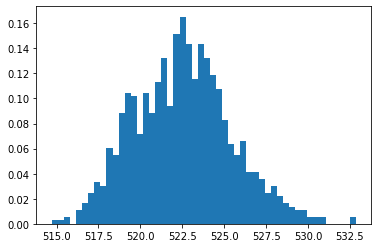

In [140]:
Z_mille = tirage(1000)


plt.hist(np.array(Z_mille), bins=50, density=True, label="Data")

In [157]:
# on utilise que la première méthode puisque la deuxième demande plus de complexité

m_confiancebisbis = moyenne(Z_mille)
sigma_confiancebisbis = ecartype(Z_mille)

print(
    f"[{m_confiancebis - 1.96*sigma_confiancebis} ; {m_confiancebis + 1.96*sigma_confiancebis}]"
)

[515.8603380488048 ; 528.150553187791]


In [142]:
from random import *

Zp = tirage(10000)
S = 0
for n in range(1000):
    pourcentage = len([v for v in sample(Zp, 1000) if v >= 525]) / 1000
    S += pourcentage
S = S / 1000

print(S)

0.18801800000000032


In [160]:
print(len([v for v in Z_mille if v>=525])/1000)

0.186


2. Avec 10000

(array([0.00120942, 0.00024188, 0.00096754, 0.00266073, 0.00435392,
        0.00774029, 0.01015914, 0.01402928, 0.02104393, 0.02805857,
        0.03894336, 0.04619988, 0.06022917, 0.08320817, 0.08465947,
        0.10280079, 0.1117505 , 0.12529602, 0.1255379 , 0.13593892,
        0.13835776, 0.14150226, 0.13642269, 0.13424573, 0.12311906,
        0.10884789, 0.10594528, 0.0873202 , 0.08393382, 0.07208149,
        0.05732656, 0.04499046, 0.03942712, 0.02781668, 0.02805857,
        0.02249523, 0.01572247, 0.01136856, 0.00870783, 0.00943348,
        0.00483768, 0.00266073, 0.00241884, 0.00193507, 0.00290261,
        0.00072565, 0.        , 0.00024188, 0.00072565, 0.00024188]),
 array([513.4584157 , 513.87183667, 514.28525763, 514.6986786 ,
        515.11209956, 515.52552053, 515.93894149, 516.35236246,
        516.76578342, 517.17920439, 517.59262535, 518.00604632,
        518.41946728, 518.83288825, 519.24630921, 519.65973018,
        520.07315114, 520.4865721 , 520.89999307, 521.31341403

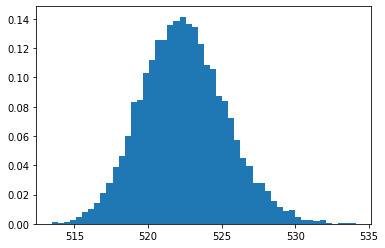

In [144]:
Z_dixmille = tirage(10000)


plt.hist(np.array(Z_dixmille), bins=50, density=True, label="Data")

In [158]:
m_confiancebisbis = moyenne(Z_dixmille)
sigma_confiancebisbis = ecartype(Z_dixmille)

print(
    f"[{m_confiancebisbis - 1.96*sigma_confiancebisbis} ; {m_confiancebisbis + 1.96*sigma_confiancebisbis}]"
)

[516.8188381553512 ; 528.0532223294372]


In [159]:
print(len([v for v in Z_dixmille if v >= 525]) / 10000)

0.1833


3. Avec 100000

(array([1.83442350e-05, 0.00000000e+00, 5.50327049e-05, 9.17211748e-05,
        2.38475054e-04, 4.58605874e-04, 1.33912915e-03, 2.86170065e-03,
        4.93459920e-03, 9.44728100e-03, 1.51339938e-02, 2.40126036e-02,
        3.55327831e-02, 4.87222880e-02, 6.53605091e-02, 8.17419110e-02,
        9.90405245e-02, 1.13734257e-01, 1.27492433e-01, 1.36774616e-01,
        1.40755315e-01, 1.34499931e-01, 1.30922805e-01, 1.19237527e-01,
        1.09056477e-01, 9.40692368e-02, 7.72842619e-02, 6.50486571e-02,
        5.27029870e-02, 4.04490381e-02, 2.99011030e-02, 2.17195742e-02,
        1.72068924e-02, 1.12266718e-02, 7.35603822e-03, 5.63168013e-03,
        3.44871617e-03, 2.53150442e-03, 1.52257150e-03, 1.00893292e-03,
        7.15425163e-04, 4.76950109e-04, 2.75163524e-04, 1.46753880e-04,
        1.10065410e-04, 7.33769398e-05, 1.83442350e-05, 1.83442350e-05,
        0.00000000e+00, 1.83442350e-05]),
 array([510.83356515, 511.37869554, 511.92382594, 512.46895633,
        513.01408672, 513.5592

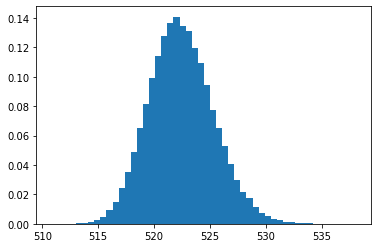

In [147]:
Z_centmille = tirage(100000)


plt.hist(np.array(Z_centmille), bins=50, density=True, label="Data")

On remarque que quand le nombre de simulations augmente, la courbe tend vers une gaussienne, ce qui illustre le TCL.

In [161]:
m_confiancebisbisbis = moyenne(Z_centmille)
sigma_confiancebisbisbis = ecartype(Z_centmille)

print(
    f"[{m_confiancebisbisbis - 1.96*sigma_confiancebisbisbis} ; {m_confiancebisbisbis + 1.96*sigma_confiancebisbisbis}]"
)

[516.7714134314937 ; 528.1194879799422]


In [162]:
print(len([v for v in Z_centmille if v >= 525]) / 100000)

0.18528


La probabilité semble se fixer entre 0.18 et 0.19